In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import re

In [2]:
df = pd.read_csv('src/data/grailed.csv')

## Data Cleaning

In [3]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
df.dropna(subset = ['Location'], inplace= True)

In [5]:
# Converting and reformatting price columns

def dollars_to_int(column):
    column = column.str.replace('$', '')
    column = column.str.replace(',', '')
    return pd.to_numeric(column) 

df.Price = dollars_to_int(df.Price)
df.NewPrice = dollars_to_int(df.NewPrice)
df.OldPrice = dollars_to_int(df.OldPrice)

In [6]:
# Reformatting current number of listings column and filling NaN values

def format_listings(column):
    listings = []
    for i in column:
        try:
            listings.append(int(i.split()[0]))
        except AttributeError:
            listings.append(i)
    return listings

df.CurrentListings = format_listings(df.CurrentListings)
df.CurrentListings.fillna(0, inplace=True)

In [7]:
# Creating dummy columns for every size

size_dummies = pd.get_dummies(df.Size)
df.drop(columns= 'Size', inplace = True)
size_dummies.drop(columns = 'XXS', inplace = True)

In [8]:
df = pd.concat([df, size_dummies], axis = 1)

In [9]:
df.Price.fillna(df.NewPrice, inplace = True)

In [10]:
df['PriceDropped'] = df.OldPrice = df.NewPrice

In [11]:
df['PriceDropped'].fillna(0, inplace = True)

In [12]:
df.drop(columns = ['OldPrice', 'NewPrice'], inplace = True)

In [13]:
df.Location = df.Location.str.replace('Shipping: ', '')
df.Location = df.Location.str.replace(' to', '')

In [14]:
loc_dummies = pd.get_dummies(df.Location)

In [15]:
loc_dummies.drop(columns = ['- Ask for shipping', 'Add a comment'], inplace = True)

In [16]:
df = pd.concat([df, loc_dummies], axis = 1)

In [17]:
df.Feedback = df.Feedback.str.replace(' Feedback', '')

In [18]:
df.Feedback = pd.to_numeric(df.Feedback)
df.Feedback.fillna(0, inplace = True)

In [19]:
df.Sold = df.Sold.str.replace('(', '')
df.Sold = df.Sold.str.replace(')', '')
df.Sold = pd.to_numeric(df.Sold)
df.Sold.fillna(0, inplace = True)

In [20]:
df.FollowerCount.fillna(0, inplace = True)

In [30]:
for i, name in enumerate(df.Designer):
    name = str(name)
    name.strip()
    if 'NIKE' in name:
        df.Designer[i] = 'NIKE'
    elif 'ADIDAS' in name:
        df.Designer[i] = 'ADIDAS'
    elif 'COMME DES GARCONS' in name:
        df.Designer[i] = 'COMME DES GARCONS'
    elif 'SUPREME' in name:
        df.Designer[i] = 'SUPREME'
    elif 'PALACE' in name:
        df.Designer[i] = 'PALACE'
    elif 'CHROME' in name:
        df.Designer[i] = 'CHROME HEARTS'
    elif 'FEAR' in name:
        df.Designer[i] = 'FEAR OF GOD'
    elif 'WHITE' in name:
        df.Designer[i] = 'OFF WHITE'
    elif 'KAPITAL' in name:
        df.Designer[i] = 'KAPITAL'
    elif 'BAPE' in name:
        df.Designer[i] = 'BAPE'
    elif 'KANYE' in name or 'YEEZY' in name:
        df.Designer[i] = 'YEEZY SEASON'
    elif 'LAUREN' in name:
        df.Designer[i] = 'RALPH LAUREN'
    elif 'ISSEY' in name or 'YAMAMOTO' in name or 'JAPANESE DESIGNER' in name:
        df.Designer[i] = 'JAPANESE DESIGNER'
    elif 'LAURENT' in name:
        df.Designer[i] = 'SAINT LAURENT'
    elif 'ACNE' in name:
        df.Designer[i] = 'ACNE STUDIOS'
    elif 'RAF' in name:
        df.Designer[i] = 'RAF SIMMONS'
    elif 'VETEMENTS' in name:
        df.Designer[i] = 'VETEMENTS'
    elif 'GIVENCHY' in name:
        df.Designer[i] = 'GIVENCHY'
    elif 'OWENS' in name:
        df.Designer[i] = 'RICK OWENS'
    elif 'GUCCI' in name:
        df.Designer[i] = 'GUCCI'
    elif 'PRADA' in name:
        df.Designer[i] = 'PRADA'
    elif 'MARGIELA' in name:
        df.Designer[i] = 'MAISON MARGIELA'
    elif 'UNIQLO' in name:
        df.Designer[i] = 'UNIQLO'
    elif 'SOCIAL' in name:
        df.Designer[i] = 'ANTI SOCIAL SOCIAL CLUB'
    elif 'STUSSY' in name:
        df.Designer[i] = 'STUSSY'
    elif 'DISNEY' in name:
        df.Designer[i] = 'DISNEY'
    elif 'CHAMPION' in name:
        df.Designer[i] = 'CHAMPION'
    elif 'HAWAIIAN' in name or 'CRAZY SHIRTS' in name or 'SURF' in name:
        df.Designer[i] = 'HAWAIIAN SHIRT'
    elif 'BAND TEES' in name:
        df.Designer[i] = 'BAND TEES'
    elif 'JAPANESE BRAND' in name:
        df.Designer[i] = 'JAPANESE BRAND'
    elif 'STREETWEAR' in name:
        df.Designer[i] = 'STREETWEAR'
    elif 'VINTAGE' in name:
        df.Designer[i] = 'VINTAGE'
    else:
        df.Designer[i] = 'MISC'
    

In [33]:
df.Designer.sort_values

<bound method Series.sort_values of 0                    BAPE
1                    NIKE
2       COMME DES GARCONS
3              STREETWEAR
4                    NIKE
              ...        
624            STREETWEAR
1385            BAND TEES
1479                 BAPE
5590       JAPANESE BRAND
6433       JAPANESE BRAND
Name: Designer, Length: 10100, dtype: object>

In [34]:
designers = pd.get_dummies(df.Designer)

In [35]:
designers.drop(columns= 'DISNEY', inplace = True)
df = pd.concat([df, designers], axis = 1)

In [39]:
df = df.dropna(subset=['Name'])

In [46]:
df_model = df[['Price', 
                 'Sold', 
                 'Feedback', 
                 'CurrentListings', 
                 'FollowerCount', 
                 'L', 'M', 'S', 'XL', 'XS', 'XXL',
                 'PriceDropped',
                 'AU', 'Asia', 'Canada', 'Europe', 'UK', 'US',
                 'ACNE STUDIOS',
                 'ADIDAS',
                 'ANTI SOCIAL SOCIAL CLUB',
                 'BAND TEES',
                 'BAPE',
                 'CHAMPION',
                 'CHROME HEARTS', 
                 'COMME DES GARCONS', 
                 'FEAR OF GOD', 
                 'GIVENCHY', 
                 'GUCCI', 
                 'HAWAIIAN SHIRT', 
                 'JAPANESE BRAND', 
                 'JAPANESE DESIGNER', 
                 'KAPITAL', 
                 'MAISON MARGIELA', 
                 'MISC', 
                 'NIKE', 
                 'OFF WHITE', 
                 'PALACE', 
                 'PRADA', 
                 'RAF SIMMONS', 
                 'RALPH LAUREN', 
                 'RICK OWENS', 
                 'STREETWEAR', 
                 'STUSSY', 
                 'SUPREME', 
                 'UNIQLO',
                 'VETEMENTS', 
                 'VINTAGE', 
                 'YEEZY SEASON' ]]

In [47]:
df_model

,Price,Sold,Feedback,CurrentListings,FollowerCount,L,M,S,XL,XS,...,RAF SIMMONS,RALPH LAUREN,RICK OWENS,STREETWEAR,STUSSY,SUPREME,UNIQLO,VETEMENTS,VINTAGE,YEEZY SEASON
0,155.0,122.0,77.0,59.0,111.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,100.0,14.0,8.0,47.0,87.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,129.0,52.0,25.0,9.0,168.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,25.0,2275.0,1086.0,189.0,107.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,55.0,541.0,275.0,46.0,108.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,100.0,51.0,19.0,594.0,10.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
10096,200.0,51.0,19.0,594.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10097,115.0,4.0,2.0,14.0,29.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10098,70.0,275.0,158.0,566.0,6.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import seaborn as sns

In [51]:
X = df_model.drop(columns = 'Feedback')
y = df_model.Feedback

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [72]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [63]:
print('Train RMSE: ', mean_squared_error(y_train, y_pred)**.5)
# print('Test RMSE: ', mean_squared_error(y_test, y_test_pred**.5))

Train RMSE:  175.09128118103038


In [65]:
pca = PCA()

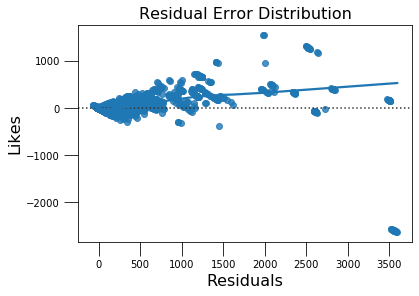

In [69]:
sns.residplot(y_pred, y_train, lowess=True)
plt.xlabel('Residuals', fontsize = 16)
plt.ylabel('Likes', fontsize = 16)
plt.title('Residual Error Distribution', fontsize = 16)
plt.tick_params(size = 14)

In [ ]:
# Correlation Matrix
# PCA
# K-Means Clustering
